# Reto 02: Modelos y Capacidades de OpenAI

## Introducción

En este reto, aprenderás sobre las diferentes capacidades de los modelos de OpenAI y cómo elegir el mejor modelo para tu caso de uso.

Vas a comparar el modelo GPT-3.5 con el modelo GPT-4 en este desafío. Si no tienes acceso a GPT-4, puedes comparar los modelos heredados si están implementados, o realizar este desafío de manera conceptual para entender cómo elegir el mejor modelo entre los que tienes implementados, así como los que están en el catálogo de modelos.

En un mundo donde la disponibilidad y el desarrollo de modelos están en constante cambio, el modelo que comparemos puede cambiar con el tiempo. Pero te animamos a entender los conceptos generales y el material en este desafío porque las técnicas de comparación utilizadas pueden aplicarse a escenarios en los que estés comparando Modelos de Lenguaje de Gran Escala.

Preguntas que podrás responder al final de este desafío:

* ¿Cómo difieren las respuestas de cada modelo?
* ¿Cuáles son las formas de evaluar el rendimiento de los modelos?

## 1. Descripción general sobre cómo encontrar el modelo adecuado para ti

### 1.1 Familias de Modelos

Azure OpenAI proporciona acceso a muchos modelos diferentes, agrupados por familia y capacidad. Una familia de modelos generalmente asocia modelos según su tarea prevista.

Las familias de modelos disponibles actualmente a partir del _1 de diciembre de 2023_ en Azure OpenAI incluyen GPT-4, GPT-3.5, Embeddings, DALL-E y Whisper. Consulta este enlace para obtener más información: [Azure OpenAI Modelos](https://learn.microsoft.com/en-us/azure/ai-services/openai/concepts/models)

Para GPT-3 y otros modelos que se retirarán en julio de 2024, consulta [Modelos heredados del servicio Azure OpenAI](https://learn.microsoft.com/en-us/azure/ai-services/openai/concepts/legacy-models).

### 1.2 Capacidades del Modelo
#### GPT-4
GPT-4 puede resolver problemas difíciles con mayor precisión que cualquiera de los modelos anteriores de OpenAI. Al igual que GPT-3.5 Turbo, GPT-4 está optimizado para chat y funciona bien para tareas de finalización tradicionales. Usa la API de Chat Completions para usar GPT-4.

#### GPT-3.5
Los modelos GPT-3.5 pueden entender y generar lenguaje natural o código. El modelo más capaz y rentable de la familia GPT-3.5 es GPT-3.5 Turbo, que ha sido optimizado para chat y también funciona bien para tareas de finalización tradicionales. GPT-3.5 Turbo está disponible para usar con la API de Chat Completions. GPT-3.5 Turbo Instruct tiene capacidades similares a text-davinci-003 utilizando la API de Completions en lugar de la API de Chat Completions. Recomendamos usar GPT-3.5 Turbo y GPT-3.5 Turbo Instruct sobre los modelos heredados GPT-3.5 y GPT-3.

`gpt-35-turbo`

`gpt-35-turbo-16k`

`gpt-35-turbo-instruct`

Puedes ver la longitud del contexto de tokens admitida por cada modelo en la [tabla resumen del modelo](https://learn.microsoft.com/en-us/azure/ai-services/openai/concepts/models#model-summary-table-and-region-availability).

#### Embeddings
Los modelos de embeddings anteriores se han consolidado en el siguiente nuevo modelo de reemplazo:

`text-embedding-ada-002`

[Modelos de Azure OpenAI](https://learn.microsoft.com/en-us/azure/cognitive-services/openai/concepts/models)  

| Modelos | Descripción |
| --- | --- |
| GPT-4 | Un conjunto de modelos que mejoran GPT-3.5 y pueden entender y generar lenguaje natural y código. | 
| GPT-3.5 | Un conjunto de modelos que mejoran GPT-3 y pueden entender y generar lenguaje natural y código. | 
| Embeddings | Un conjunto de modelos que pueden convertir texto en forma de vector numérico para facilitar la similitud de texto. |

### 1.3 Detalles de Precios

Para obtener la información más actualizada, consulta la [página de precios](https://azure.microsoft.com/en-us/pricing/details/cognitive-services/openai-service/) de Azure OpenAI.

### 1.4 Cuotas y Límites

*Los límites a continuación están sujetos a cambios. Anticipamos que necesitarás límites más altos a medida que avances y tu solución escale. Cuando conozcas los requisitos de tu solución, comunícate solicitando un aumento de cuota aquí: [Solicitud de aumento de cuota](https://aka.ms/oai/quotaincrease).

| Nombre del Límite | Valor del Límite |
| --- | --- |
| Recursos de OpenAI por región por suscripción de Azure | 30 |
| Límites de cuota predeterminados de DALL-E 2 | 2 solicitudes concurrentes |
| Límites de cuota predeterminados de DALL-E 3 | 2 unidades de capacidad (6 solicitudes por minuto) |
| Máximo de tokens de prompt por solicitud | Varía según el modelo, consulta [Modelos de Azure OpenAI](https://learn.microsoft.com/en-us/azure/ai-services/openai/concepts/models) |
| Máximas implementaciones de modelos ajustados | 5 |
| Número total de trabajos de entrenamiento por recurso | 100 |
| Máximo de trabajos de entrenamiento simultáneos por recurso | 1 |
| Máximo de trabajos de entrenamiento en cola | 20 |
| Máximo de archivos por recurso | 30 |
| Tamaño total de todos los archivos por recurso | 1 GB |
| Tiempo máximo de trabajo de entrenamiento (el trabajo fallará si se excede) | 720 horas |
| Tamaño máximo de trabajo de entrenamiento (tokens en el archivo de entrenamiento) x (# de épocas) | 2 mil millones |
| Tamaño máximo de todos los archivos por carga (Azure OpenAI en tus datos) | 16 MB |

### 1.5 Selección de Modelos

Aquí tienes algunas recomendaciones generales sobre los escenarios adecuados que tienden a diferenciar los modelos. Ten en cuenta que estas no son reglas estrictas y, a menudo, la experimentación y la evaluación comparativa son importantes para tomar la mejor decisión para tu solución.

| Modelo | Casos de Uso |
| --- | --- |
| GPT-3.5 | Rendimiento de aplicaciones más rápido/económico; <br/> Mayor cuota asignada por defecto |
| GPT-4 | Necesidad de razonamiento o procesamiento lógico más avanzado; <br/> Ventana de 32k tokens es absolutamente necesaria; <br/> Se necesita competencia multilingüe; <br/> No hay un requisito estricto de baja latencia |

## 2. Empecemos la Implementación

Si aún no tienes instalados los paquetes OpenAI, Python-dotenv, plotly o scikit-learn en tu equipo, las siguientes celdas los instalarán.


In [1]:
import openai
import os
import json
from dotenv import load_dotenv, find_dotenv
import pandas as pd
load_dotenv(find_dotenv())

True

Configura tu entorno para acceder a tus claves de OpenAI. Consulta tu recurso de OpenAI en el Portal de Azure para recuperar la información sobre tu punto final y claves de OpenAI.

Por razones de seguridad, almacena tu información sensible en un archivo .env.

In [2]:
API_KEY = os.getenv("OPENAI_API_KEY")
assert API_KEY, "ERROR: Azure OpenAI Key is missing"
openai.api_key = API_KEY

RESOURCE_ENDPOINT = os.getenv("OPENAI_API_BASE","").strip()
assert RESOURCE_ENDPOINT, "ERROR: Azure OpenAI Endpoint is missing"
assert "openai.azure.com" in RESOURCE_ENDPOINT.lower(), "ERROR: Azure OpenAI Endpoint should be in the form: \n\n\t<your unique endpoint identifier>.openai.azure.com"

openai.api_base = RESOURCE_ENDPOINT
openai.api_type = os.getenv("OPENAI_API_TYPE")
openai.api_version = os.getenv("OPENAI_API_VERSION")

chat_model=os.getenv("CHAT_MODEL_NAME")
chat_model2=os.getenv("CHAT_MODEL_NAME2")
text_model=os.getenv("EMBEDDING_MODEL_NAME")

### 2.0 Funciones Auxiliares
A lo largo de este curso, utilizaremos los modelos `gpt-3.5-turbo` y `gpt-4` de OpenAI y el [punto final de chat completions](https://platform.openai.com/docs/guides/chat).

Esta función auxiliar hará que sea más fácil usar prompts y ver las salidas generadas.

**timer wrapper** nos ayuda a monitorear y comparar la latencia de cada modelo.

**get_chat_completion** ayuda a crear la respuesta de OpenAI utilizando el modelo de chat de tu elección.

**get_completion_from_messages** ayuda a crear la respuesta de OpenAI utilizando el modelo de chat de tu elección, habilitando el historial de chat.

In [3]:
import functools
import time

def timer(func):
    @functools.wraps(func)
    def wrapper(*args, **kwargs):
        start_time = time.perf_counter()
        value = func(*args, **kwargs)
        end_time = time.perf_counter()
        run_time = end_time - start_time
        print("Finished {} in {} secs".format(repr(func.__name__), round(run_time, 3)))
        return value[0], value[1], round(run_time, 3)

    return wrapper

In [4]:
@timer
def get_chat_completion(prompt, model):
    messages = [{"role": "user", "content": prompt}]
    response = openai.ChatCompletion.create(
        engine=model,
        messages=messages,
        temperature=0, # this is the degree of randomness of the model's output
        max_tokens = 200,
        top_p = 1.0,
    )
    return response.choices[0].message["content"],response['usage']['total_tokens']

In [5]:
@timer
def get_completion_from_messages(messages, model, temperature=0):
    response = openai.ChatCompletion.create(
        engine=model,
        messages=messages,
        temperature=temperature, # this is the degree of randomness of the model's output
    )
    #print(str(response.choices[0].message))
    return response.choices[0].message["content"],response['usage']['total_tokens']

### 2.1 Resumir Texto

In [6]:
model_pricing = pd.DataFrame(columns=['model', 'price', 'time'])

In [8]:
text = f"""
The Olympic Games Tokyo 2020 reached a global broadcast audience of 3.05 billion people, according to independent research conducted on behalf of the International Olympic Committee (IOC). Official coverage on Olympic broadcast partners\' digital platforms alone generated 28 billion video views in total – representing a 139 per cent increase compared with the Olympic Games Rio 2016 and underlining the changing media landscape and Tokyo 2020\'s designation as the first streaming Games and the most watched Olympic Games ever on digital platforms.Sony and Panasonic partnered with NHK to develop broadcasting standards for 8K resolution television, with a goal to release 8K television sets in time for the 2020 Summer Olympics. In early 2019, Italian broadcaster RAI announced its intention to deploy 8K broadcasting for the Games. NHK broadcast the opening and closing ceremonies, and coverage of selected events in 8K. Telecom company NTT Docomo signed a deal with Finland\'s Nokia to provide 5G-ready baseband networks in Japan in time for the Games.The Tokyo Olympics were broadcast in the United States by NBCUniversal networks, as part of a US$4.38 billion agreement that began at the 2014 Winter Olympics in Sochi. The United States Olympic & Paralympic Committee asserted that a "right of abatement" clause in the contract was triggered by the delay of the Games to 2021, requiring the IOC to "negotiate in good faith an equitable reduction in the applicable broadcast rights payments" by NBC, which remains one of IOC\'s biggest revenue streams. According to NBCUniversal CEO Jeff Shell, the Tokyo games could be the most profitable Olympics in NBC\'s history. The Tokyo games were NBC\'s first Olympics broadcast under current president Susan Rosner Rovner.In Europe, this was the first Summer Olympics under the IOC\'s exclusive pan-European rights deal with Eurosport, which began at the 2018 Winter Olympics and is contracted to run through 2024. The rights for the 2020 Summer Olympics covered almost all of Europe; a pre-existing deal with a marketer excludes Russia. Eurosport planned to sub-license coverage to free-to-air networks in each territory, and other channels owned by Discovery, Inc. subsidiaries. In the United Kingdom, these were set to be the last Games with rights owned primarily by the BBC, although as a condition of a sub-licensing agreement due to carry into the 2022 and 2024 Games, Eurosport holds exclusive pay television rights. In France, these were the last Games whose rights are primarily owned by France Télévisions. Eurosport debuted as pay television rightsholder, after Canal+ elected to sell its pay television rights as a cost-saving measure.In Canada, the 2020 Games were shown on CBC/Radio-Canada platforms, Sportsnet, TSN and TLN. In Australia, they were aired by Seven Network. In the Indian subcontinent, they were aired by Sony Pictures Networks India (SPN).
"""
prompt = f"""
Summarize the text delimited by triple backticks into a single sentence.
```{text}```
"""

gpt35_response, gpt35_price, gpt35_time = get_chat_completion(prompt, model=chat_model)
gpt4_response, gpt4_price, gpt4_time = get_chat_completion(prompt, model=chat_model2)

print(f"GPT-3.5 Response: {gpt35_response}\n")
print(f"GPT-4 Response: {gpt4_response}\n")

new_rows = pd.DataFrame([{'model': 'gpt3.5', 'price': gpt35_price, 'time': gpt35_time},
                         {'model': 'gpt4', 'price': gpt4_price, 'time': gpt4_time}])
pricing = pd.concat([model_pricing, new_rows], ignore_index=True)
pricing

Finished 'get_chat_completion' in 2.468 secs
Finished 'get_chat_completion' in 3.728 secs
GPT-3.5 Response: The Olympic Games Tokyo 2020 had a global broadcast audience of 3.05 billion people, with 28 billion video views on digital platforms, making it the most watched Olympic Games ever on digital platforms; Sony and Panasonic partnered with NHK to develop 8K resolution television for the Games, and NTT Docomo signed a deal with Nokia to provide 5G-ready networks; NBCUniversal broadcast the Games in the United States and is expected to be the most profitable Olympics in NBC's history; Eurosport had exclusive rights in Europe, while CBC/Radio-Canada, Seven Network, and Sony Pictures Networks India aired the Games in Canada, Australia, and the Indian subcontinent respectively.

GPT-4 Response: The Tokyo 2020 Olympics reached a global audience of 3.05 billion people, with digital platforms generating 28 billion video views, marking a 139% increase from the Rio 2016 Olympics and making it

/tmp/ipykernel_84090/1379165866.py:17: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  pricing = pd.concat([model_pricing, new_rows], ignore_index=True)


,model,price,time
0,gpt3.5,770,2.468
1,gpt4,683,3.728


#### Tarea del Estudiante #1:
Con las tácticas aprendidas en el CH1, edita el prompt para obtener una respuesta más concisa del asistente. ¿Encuentras alguna diferencia en el resultado?

In [14]:
# Edit the prompt to get more concise answer from assistant

text = f"""
The Olympic Games Tokyo 2020 reached a global broadcast audience of 3.05 billion people, according to independent research conducted on behalf of the International Olympic Committee (IOC). Official coverage on Olympic broadcast partners\' digital platforms alone generated 28 billion video views in total – representing a 139 per cent increase compared with the Olympic Games Rio 2016 and underlining the changing media landscape and Tokyo 2020\'s designation as the first streaming Games and the most watched Olympic Games ever on digital platforms.Sony and Panasonic partnered with NHK to develop broadcasting standards for 8K resolution television, with a goal to release 8K television sets in time for the 2020 Summer Olympics. In early 2019, Italian broadcaster RAI announced its intention to deploy 8K broadcasting for the Games. NHK broadcast the opening and closing ceremonies, and coverage of selected events in 8K. Telecom company NTT Docomo signed a deal with Finland\'s Nokia to provide 5G-ready baseband networks in Japan in time for the Games.The Tokyo Olympics were broadcast in the United States by NBCUniversal networks, as part of a US$4.38 billion agreement that began at the 2014 Winter Olympics in Sochi. The United States Olympic & Paralympic Committee asserted that a "right of abatement" clause in the contract was triggered by the delay of the Games to 2021, requiring the IOC to "negotiate in good faith an equitable reduction in the applicable broadcast rights payments" by NBC, which remains one of IOC\'s biggest revenue streams. According to NBCUniversal CEO Jeff Shell, the Tokyo games could be the most profitable Olympics in NBC\'s history. The Tokyo games were NBC\'s first Olympics broadcast under current president Susan Rosner Rovner.In Europe, this was the first Summer Olympics under the IOC\'s exclusive pan-European rights deal with Eurosport, which began at the 2018 Winter Olympics and is contracted to run through 2024. The rights for the 2020 Summer Olympics covered almost all of Europe; a pre-existing deal with a marketer excludes Russia. Eurosport planned to sub-license coverage to free-to-air networks in each territory, and other channels owned by Discovery, Inc. subsidiaries. In the United Kingdom, these were set to be the last Games with rights owned primarily by the BBC, although as a condition of a sub-licensing agreement due to carry into the 2022 and 2024 Games, Eurosport holds exclusive pay television rights. In France, these were the last Games whose rights are primarily owned by France Télévisions. Eurosport debuted as pay television rightsholder, after Canal+ elected to sell its pay television rights as a cost-saving measure.In Canada, the 2020 Games were shown on CBC/Radio-Canada platforms, Sportsnet, TSN and TLN. In Australia, they were aired by Seven Network. In the Indian subcontinent, they were aired by Sony Pictures Networks India (SPN).
"""
prompt = f"""
Resume en español el siguiente texto de manera concisa en una frase.
```{text}```
"""

gpt35_response, gpt35_price, gpt35_time = get_chat_completion(prompt, model=chat_model)
gpt4_response, gpt4_price, gpt4_time = get_chat_completion(prompt, model=chat_model2)

print(f"GPT-3.5 Response: {gpt35_response}\n")
print(f"GPT-4 Response: {gpt4_response}\n")

new_rows = pd.DataFrame([{'model': 'gpt3.5', 'price': gpt35_price, 'time': gpt35_time},
                         {'model': 'gpt4', 'price': gpt4_price, 'time': gpt4_time}])
pricing = pd.concat([model_pricing, new_rows], ignore_index=True)
pricing

Finished 'get_chat_completion' in 1.782 secs
Finished 'get_chat_completion' in 5.867 secs
GPT-3.5 Response: Los Juegos Olímpicos de Tokio 2020 alcanzaron una audiencia global de 3.05 mil millones de personas, generando 28 mil millones de vistas de video en plataformas digitales, convirtiéndose en los Juegos Olímpicos más vistos en plataformas digitales.

GPT-4 Response: Los Juegos Olímpicos de Tokio 2020 alcanzaron una audiencia global de 3.05 mil millones de personas, con 28 mil millones de visualizaciones de video en las plataformas digitales de los socios de transmisión, lo que representa un aumento del 139% en comparación con los Juegos Olímpicos de Río 2016, convirtiéndose en los Juegos más vistos en plataformas digitales.



/tmp/ipykernel_84090/581949877.py:19: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  pricing = pd.concat([model_pricing, new_rows], ignore_index=True)


,model,price,time
0,gpt3.5,701,1.782
1,gpt4,734,5.867


### 2.2 Resumir para una audiencia específica

In [12]:
prompt = f"""
Summarize the text delimited by triple backticks into a single sentence for 7-year-old to understand.
```{text}```
"""

gpt35_response, gpt35_price, gpt35_time = get_chat_completion(prompt, model=chat_model)
gpt4_response, gpt4_price, gpt4_time = get_chat_completion(prompt, model=chat_model2)
print(f"GPT-3.5 Response: {gpt35_response}\n")
print(f"GPT-4 Response: {gpt4_response}\n")

new_rows = pd.DataFrame([{'model': 'gpt3.5', 'price': gpt35_price, 'time': gpt35_time},
                                       {'model': 'gpt4', 'price': gpt4_price, 'time': gpt4_time}])
pricing = pd.concat([model_pricing, new_rows], ignore_index=True)
pricing

Finished 'get_chat_completion' in 1.154 secs
Finished 'get_chat_completion' in 3.85 secs
GPT-3.5 Response: The Olympic Games in Tokyo were watched by a lot of people on TV and online, and they were shown on different channels in different countries like NBC in the United States, Eurosport in Europe, CBC/Radio-Canada in Canada, Seven Network in Australia, and Sony Pictures Networks India in the Indian subcontinent.

GPT-4 Response: The 2020 Tokyo Olympics was watched by over 3 billion people worldwide, with a lot of people watching online, making it the most watched Olympics ever on digital platforms. Different TV companies from around the world worked together to show the games in the best quality possible.



/tmp/ipykernel_84090/3194699763.py:13: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  pricing = pd.concat([model_pricing, new_rows], ignore_index=True)


,model,price,time
0,gpt3.5,700,1.154
1,gpt4,691,3.850


#### Desafío del Estudiante #2:
Edita el prompt para resumir el texto en un título llamativo para un periódico. Compara diferentes resultados.

In [15]:
# Edita el prompt para resumir el texto en un título llamativo para un periódico. Compara diferentes resultados.

prompt = f"""
Resume en español el texto en forma de noticia para un periodico
```{text}```
"""

gpt35_response, gpt35_price, gpt35_time = get_chat_completion(prompt, model=chat_model)
gpt4_response, gpt4_price, gpt4_time = get_chat_completion(prompt, model=chat_model2)
print(f"GPT-3.5 Response: {gpt35_response}\n")
print(f"GPT-4 Response: {gpt4_response}\n")

new_rows = pd.DataFrame([{'model': 'gpt3.5', 'price': gpt35_price, 'time': gpt35_time},
                                       {'model': 'gpt4', 'price': gpt4_price, 'time': gpt4_time}])
pricing = pd.concat([model_pricing, new_rows], ignore_index=True)
pricing

Finished 'get_chat_completion' in 3.097 secs
Finished 'get_chat_completion' in 17.456 secs
GPT-3.5 Response: Los Juegos Olímpicos de Tokio 2020 alcanzaron una audiencia global de 3.05 mil millones de personas, según una investigación independiente realizada en nombre del Comité Olímpico Internacional (COI). La cobertura oficial en las plataformas digitales de los socios de transmisión generó un total de 28 mil millones de vistas de video, lo que representa un aumento del 139 por ciento en comparación con los Juegos Olímpicos de Río 2016 y subraya el cambio en el panorama de los medios de comunicación y la designación de Tokio 2020 como los primeros Juegos de transmisión y los Juegos Olímpicos más vistos en plataformas digitales.

Sony y Panasonic se asociaron con NHK para desarrollar estándares de transmisión para televisores de resolución 8K, con el objetivo de lanz

GPT-4 Response: Los Juegos Olímpicos de Tokio 2020 alcanzaron una audiencia global de 3.05 mil millones de personas, se

/tmp/ipykernel_84090/2921822070.py:15: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  pricing = pd.concat([model_pricing, new_rows], ignore_index=True)


,model,price,time
0,gpt3.5,830,3.097
1,gpt4,830,17.456


### 2.3 Resumir causa y efecto

In [16]:
prompt = f"""
Summarize the major event's cause and effect for the text delimited by triple backticks into a single sentence less than 50 words.
```{text}```
"""

gpt35_response, gpt35_price, gpt35_time = get_chat_completion(prompt, model=chat_model)
gpt4_response, gpt4_price, gpt4_time = get_chat_completion(prompt, model=chat_model2)
print(f"GPT-3.5 Response: {gpt35_response}\n")
print(f"GPT-4 Response: {gpt4_response}\n")

new_rows = pd.DataFrame([{'model': 'gpt3.5', 'price': gpt35_price, 'time': gpt35_time},
                                       {'model': 'gpt4', 'price': gpt4_price, 'time': gpt4_time}])
pricing = pd.concat([model_pricing, new_rows], ignore_index=True)
print(pricing)

Finished 'get_chat_completion' in 1.912 secs
Finished 'get_chat_completion' in 3.387 secs
GPT-3.5 Response: The cause of the major event was the changing media landscape and Tokyo 2020 being the first streaming Games, resulting in a global broadcast audience of 3.05 billion people and a significant increase in video views on digital platforms. Additionally, partnerships were formed to develop broadcasting standards for 8K resolution television and provide 5G-ready networks. The effect of the major event was the broadcasting of the Tokyo Olympics by various networks worldwide, including NBCUniversal, Eurosport, CBC/Radio-Canada, Seven Network, and Sony Pictures Networks India.

GPT-4 Response: The Tokyo 2020 Olympics reached a global audience of 3.05 billion people, with digital platforms generating 28 billion video views, a 139% increase from the Rio 2016 Olympics, making it the most-watched Olympics on digital platforms due to advancements in broadcasting technology and strategic part

/tmp/ipykernel_84090/2048697924.py:13: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  pricing = pd.concat([model_pricing, new_rows], ignore_index=True)


#### Tarea del Estudiante #3: Comparación de Modelos
Utiliza la tabla de comparación de modelos para resumir brevemente tus hallazgos después de comparar la salida y el tiempo tomado por diferentes modelos. Por ejemplo: GPT-4: Rendimiento (+++), tiempo (+). También puedes aprovechar otros paquetes de Python para visualizar tus hallazgos.

| Modelo | Rendimiento | Tiempo |
| --- | --- | --- |
| GPT-3.5 | -| -|
| GPT-4 |+++ | +++|

#### Tarea del Estudiante #4: Clasificación de Texto
Edita el prompt para hacer que los modelos generen categorías clave de temas para el texto. Compara el rendimiento de diferentes modelos.

In [18]:
# Edita el prompt para que los modelos generen categorías clave de temas para el texto.

prompt = f"""
Encuentra los 3 temas principales (en español) del siguiente texto:
```{text}```
"""

gpt35_response, gpt35_price, gpt35_time = get_chat_completion(prompt, model=chat_model)
gpt4_response, gpt4_price, gpt4_time = get_chat_completion(prompt, model=chat_model2)
print(f"GPT-3.5 Response: {gpt35_response}\n")
print(f"GPT-4 Response: {gpt4_response}\n")

new_rows = pd.DataFrame([{'model': 'gpt3.5', 'price': gpt35_price, 'time': gpt35_time},
                                       {'model': 'gpt4', 'price': gpt4_price, 'time': gpt4_time}])
pricing = pd.concat([model_pricing, new_rows], ignore_index=True)
print(pricing)

Finished 'get_chat_completion' in 3.424 secs
Finished 'get_chat_completion' in 9.342 secs
GPT-3.5 Response: Los tres temas principales del texto son:

1. Audiencia y visualizaciones de los Juegos Olímpicos de Tokio 2020: El texto menciona que los Juegos Olímpicos de Tokio 2020 alcanzaron una audiencia global de 3.05 mil millones de personas y generaron 28 mil millones de visualizaciones en plataformas digitales de socios de transmisión. Esto destaca la importancia de la audiencia y el alcance de los Juegos Olímpicos en el panorama mediático actual.

2. Tecnología de transmisión y resolución: El texto menciona que Sony, Panasonic y NHK colaboraron para desarrollar estándares de transmisión en resolución 8K para televisores, con el objetivo de lanzar televisores 8K a tiempo para los Juegos Olímpicos de Verano de 2020. También se menciona que NHK

GPT-4 Response: 1. Audiencia global y transmisión digital de los Juegos Olímpicos de Tokio 2020.
2. Desarrollo y uso de tecnologías de transmis

/tmp/ipykernel_84090/3736521169.py:15: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  pricing = pd.concat([model_pricing, new_rows], ignore_index=True)


#### Tarea del Estudiante #5:
Edita el prompt para que los modelos generen resultados más precisos. Compara el rendimiento de diferentes modelos.

In [19]:
# Edita el prompt para que los modelos generen resultados más precisos

prompt = f"""
Encuentra los 3 temas principales (en español) del siguiente texto y describe cada uno de estos en una frase corta:
```{text}```
"""

gpt35_response, gpt35_price, gpt35_time = get_chat_completion(prompt, model=chat_model)
gpt4_response, gpt4_price, gpt4_time = get_chat_completion(prompt, model=chat_model2)
print(f"GPT-3.5 Response: {gpt35_response}\n")
print(f"GPT-4 Response: {gpt4_response}\n")

new_rows = pd.DataFrame([{'model': 'gpt3.5', 'price': gpt35_price, 'time': gpt35_time},
                                       {'model': 'gpt4', 'price': gpt4_price, 'time': gpt4_time}])
pricing = pd.concat([model_pricing, new_rows], ignore_index=True)
print(pricing)

Finished 'get_chat_completion' in 3.264 secs
Finished 'get_chat_completion' in 16.624 secs
GPT-3.5 Response: Los tres temas principales del texto son:

1. Audiencia global de los Juegos Olímpicos de Tokio 2020: El texto menciona que los Juegos Olímpicos de Tokio 2020 alcanzaron una audiencia global de 3.05 mil millones de personas, lo que destaca la gran cantidad de personas que siguieron el evento.

2. Tecnología de transmisión de los Juegos Olímpicos: Se menciona la colaboración entre Sony, Panasonic y NHK para desarrollar estándares de transmisión en resolución 8K, así como la intención de la emisora italiana RAI de utilizar la transmisión en 8K para los Juegos. También se menciona la firma de un acuerdo entre NTT Docomo y Nokia para proporcionar redes 5G en Japón.

3. Derechos de transmisión de los Juegos Olímpicos: Se

GPT-4 Response: 1. Audiencia global: Los Juegos Olímpicos de Tokio 2020 alcanzaron una audiencia global de 3.05 mil millones de personas, con un aumento del 139% en

/tmp/ipykernel_84090/2694707814.py:15: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  pricing = pd.concat([model_pricing, new_rows], ignore_index=True)


#### Tarea del Estudiante #6: Comparación de Modelos

Escribe código para crear dos gráficos de barras comparando el **precio** y el **tiempo de finalización** entre los modelos. Recomendamos utilizar la biblioteca `matplotlib.pyplot` para hacer visualizaciones.

Instrucciones para la finalización:

* Utiliza el dataframe `model_comparison` para calcular los promedios de precio y tiempo para cada modelo.
* Produce el gráfico de barras en una cantidad de moneda. Ten en cuenta que la columna `price` en el dataframe `model_comparison` está en la unidad de tokens. Consulta la [página de precios de Azure OpenAI](https://azure.microsoft.com/en-us/pricing/details/cognitive-services/openai-service/) para convertir las unidades.

In [22]:
price_gpt3_5 = (770+701+700+830+752+831+842)/7
time_gpt3_5 = (2.468+1.782+1.154+3.097+1.912+3.424+3.264)/7

price_gpt4 = (683+734+691+830+704+729+842)/7
time_gpt4 = (3.728+5.867+3.850+17.456+3.387+9.342+16.624)/7

In [25]:
model_comparison = pd.DataFrame({'price_mean':[price_gpt3_5/1000*0.0015, price_gpt4/1000*0.06], 'time_mean':[time_gpt3_5, time_gpt4]}, index=['gpt3_5','gpt4'])
model_comparison
# model_comparison['price_real_mean'] = model_comparison['price_mean']*

,price_mean,time_mean
gpt3_5,0.001163,2.443000
gpt4,0.044683,8.607714


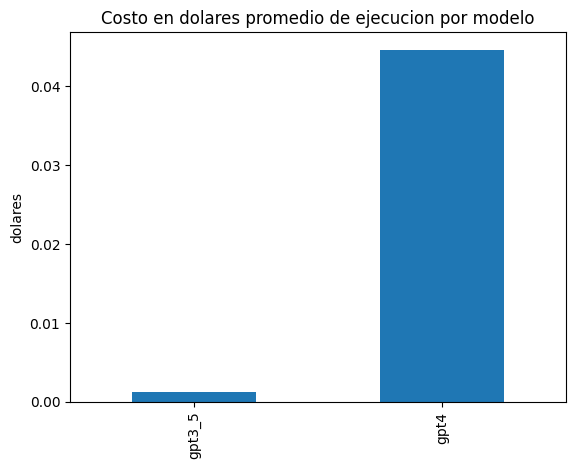

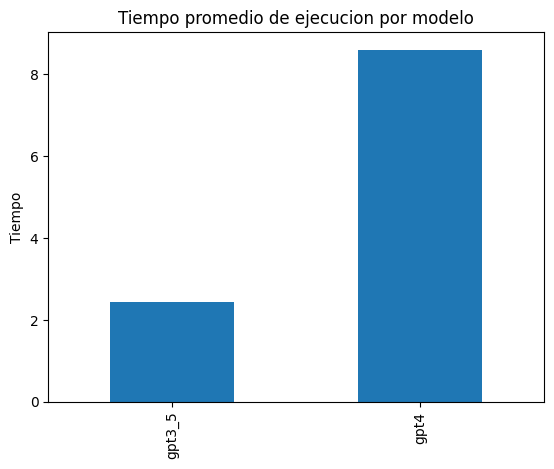

In [30]:
""" STUDENT TASK """

import matplotlib.pyplot as plt

### 1. Bar chart to compare pricing
model_comparison['price_mean'].plot.bar()
plt.title('Costo en dolares promedio de ejecucion por modelo')
plt.ylabel('dolares')
plt.show()

### 2. Bar chart to compare time for completion
model_comparison['time_mean'].plot.bar()
plt.title('Tiempo promedio de ejecucion por modelo')
plt.ylabel('Tiempo')
plt.show()

### 2.4 Generar Apodos

#### Tarea del Estudiante #7:
Utiliza diferentes modelos para crear apodos para jugadores a partir de palabras de ejemplo. Compara el rendimiento de diferentes modelos. (Puedes establecer el valor de la temperatura alto para aumentar la aleatoriedad y obtener respuestas más innovadoras.)

Descripción del jugador: The champion of Men's 100 metre freestyle swimming. Seed words: fast, strong, talented.Nick names: Swimming Genius, Dark Horse, 100-Metre-Freestyle Killer

Descripción del jugador: The champion of Women Figure Skating. Seed words: elegant, talented, soft.

In [ ]:
# Write your code here

#### Comparación de Modelos
| Modelo | Rendimiento | Tiempo | Tokens | Precios |
| --- | --- | --- | --- | --- |
| GPT-3.5 |  |  |  |  |
| GPT-4 |  |  |  |  |

### 2.5 Embeddings
Esta sección se centra en cómo recuperar incrustaciones utilizando diferentes modelos de incrustación y encontrar similitudes entre documentos.

#### Tarea del Estudiante #8:
Compara los resúmenes de dos juegos de natación en los Juegos Olímpicos de Verano de 2020 utilizando los datos proporcionados a continuación.

Observa si hay diferencias al utilizar diferentes modelos de incrustación para comparar.

In [31]:
from openai.embeddings_utils import get_embedding, cosine_similarity

In [32]:
import pandas as pd
game_summary = [
    "The mixed 100 metre medley relay event at the 2020 Summer Olympics was held in 2021 at the Tokyo Aquatics Centre. These Games marked the first time to feature a mixed-gender swimming event in the program. Each 4-person team features two male and two female swimmers in no particular order. The medals for the competition were presented by Kirsty Coventry IOC Executive Board Member, Zimbabwe; Olympian, 2 Gold Medals, 4 Silver Medals, 1 Bronze Medal, and the medalists bouquets were presented by Errol Clarke, FINA Bureau Member; Barbados.",
    "The men's 200 metre breaststroke event at the 2020 Summer Olympics was held from 27 to 29 July 2021 at the Tokyo Aquatics Centre. It was the event's twenty-sixth consecutive appearance, having been held at every edition since 1908."
]

game_highlight = [
    'The 2020 Summer Olympics featured the first ever mixed-gender swimming event, the 100 metre medley relay. Medals were presented by Kirsty Coventry and bouquets by Errol Clarke.',
    "The men's 200 metre breaststroke event was held at the 2020 Summer Olympics in Tokyo, making it the event's 26th consecutive appearance since 1908."
]

olympics_game_df = pd.DataFrame({"summary":game_summary, "qualification":game_highlight})

olympics_game_df.head()   

,summary,qualification
0,The mixed 100 metre medley relay event at the ...,The 2020 Summer Olympics featured the first ev...
1,The men's 200 metre breaststroke event at the ...,The men's 200 metre breaststroke event was hel...


In [33]:
@timer
def get_embedding(text, model=text_model):
    response = openai.Embedding.create(
        input=text,
        engine=model
    )
    return response["data"][0]["embedding"]

In [34]:
article1_embedding = get_embedding(text=olympics_game_df.summary.iloc[0])
article2_embedding = get_embedding(text=olympics_game_df.summary.iloc[1])
print(cosine_similarity(article1_embedding, article2_embedding))

Finished 'get_embedding' in 0.689 secs
Finished 'get_embedding' in 0.317 secs
0.9996218854341384


## Conclusión

En este Desafío, aprendiste sobre técnicas para comparar diferentes tipos de modelos de Azure OpenAI. Aunque recomendamos usar GPT-3.5 y GPT-4, estos métodos también se pueden aplicar a otros modelos para determinar la mejor solución para tu caso de uso. En el Desafío 3, aprenderás cómo trabajar con cantidades mayores de datos.